In [1]:
#Toka Mohammed 
#id:163240

### import libraries and load data

In [2]:
# استيراد المكتبات اللازمة
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# قراءة بيانات التدريب
PATH = "C:\\Users\\user\\OneDrive\\Desktop\\Lab Machine\\spambase_train.csv"
train = pd.read_csv(PATH)
# أول 5 صفوف من بيانات التدريب
print(train.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           1.12           0.0   
1            0.32                0.0           0.64           0.0   
2            0.00                0.0           0.00           0.0   
3            0.19                0.0           0.00           0.0   
4            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.56            0.00               0.0                0.00   
1           0.32            0.32               0.0                1.61   
2           0.34            0.00               0.0                0.34   
3           0.00            0.00               0.0                0.00   
4           0.00            0.00               0.0                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_(  char_freq_[  \
0             0.00            0.56  ...        0.101         0.00   
1 

In [4]:
# قراءة بيانات الاختبار
PATH = "C:\\Users\\user\\OneDrive\\Desktop\\Lab Machine\\spambase_test.csv"
test = pd.read_csv(PATH)
# أول 5 صفوف من بيانات الاختبار
print(test.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.00           0.00           0.0   
1            0.00               0.00           0.00           0.0   
2            0.00               0.00           0.00           0.0   
3            0.09               0.19           0.98           0.0   
4            0.00               0.42           0.42           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.00            0.00              0.00                0.00   
1           0.00            0.00              0.00                0.00   
2           0.53            0.00              0.00                0.26   
3           0.78            0.78              0.49                0.00   
4           0.00            0.00              0.00                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...          0.0        0.000   
1 

### Data preprocessing 

In [5]:
# إزالة العمود غير الضروري 'ID' من بيانات التدريب
train.drop(columns='ID', inplace=True)
# أول 5 صفوف بعد إزالة عمود 'ID'
print(train.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           1.12           0.0   
1            0.32                0.0           0.64           0.0   
2            0.00                0.0           0.00           0.0   
3            0.19                0.0           0.00           0.0   
4            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.56            0.00               0.0                0.00   
1           0.32            0.32               0.0                1.61   
2           0.34            0.00               0.0                0.34   
3           0.00            0.00               0.0                0.00   
4           0.00            0.00               0.0                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.56  ...        0.000        0.101   
1 

In [6]:
# فصل البيانات إلى ميزات (x) والهدف (y)
x = train.drop(columns='spam')
y = train['spam']


In [7]:
# تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Model Training 

In [8]:
# إنشاء نموذج الانحدار اللوجستي
model = LogisticRegression(max_iter=10000)

In [9]:
# تدريب النموذج على بيانات التدريب
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### predicion test data

In [10]:
# توقع القيم على بيانات الاختبار
y_pred = model.predict(X_test)

### model evaluation

In [11]:
# حساب دقة النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [12]:
# معالجة بيانات الاختبار
ID = test['ID']
test.drop(columns='ID', inplace=True)


In [13]:
# توقع النتائج على بيانات الاختبار
prediction = model.predict(test)

In [14]:
# إنشاء ملف تقديم النتائج
my_submission = pd.DataFrame({'ID': ID, 'spam': prediction})
# أول 5 صفوف من ملف التقديم:
print(my_submission.head())
my_submission.to_csv('logistic.csv', index=False)

     ID  spam
0  1981     0
1  1940     0
2  4260     1
3  3200     1
4  3082     1


### Data exploration and visualization

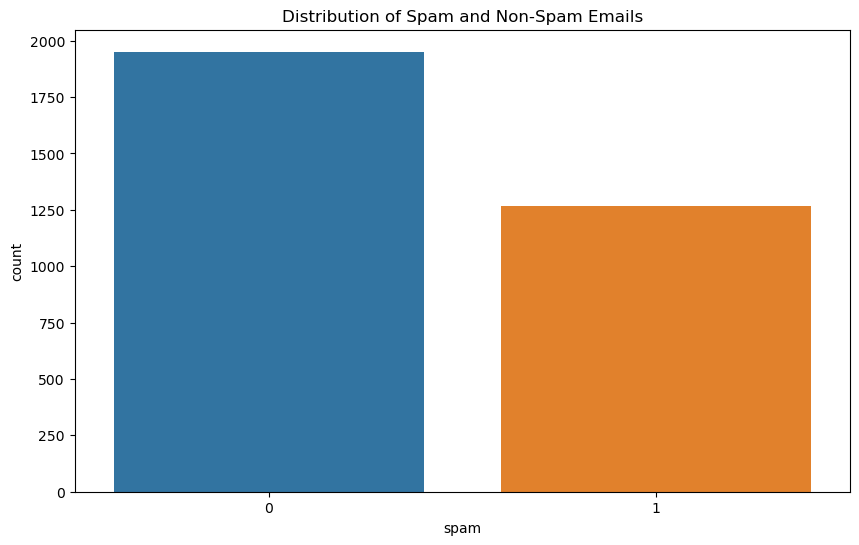

In [15]:
# إنشاء بعض الرسوم البيانية لتحليل البيانات
plt.figure(figsize=(10, 6))
sns.countplot(x='spam', data=train)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

### Feature Importance 

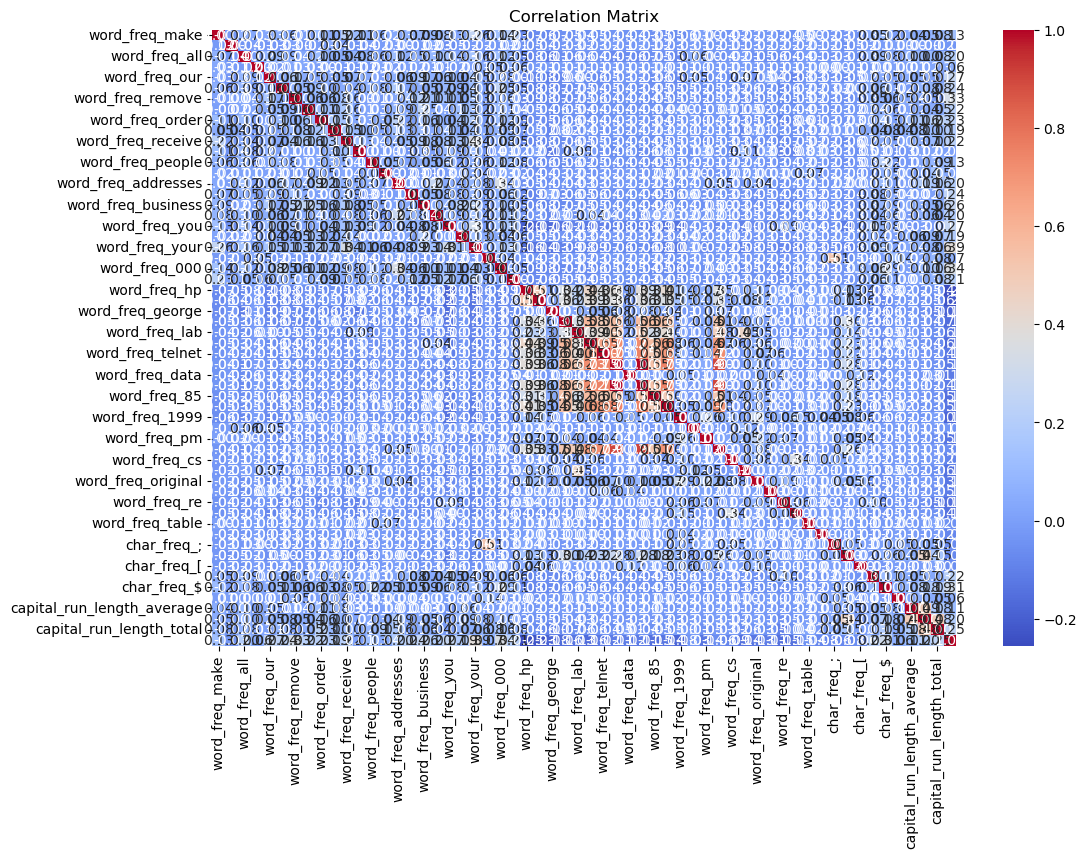

In [16]:
# رسم مصفوفة الارتباط وتحليل البيانات بصريا 
# تعلمتها من يوتيوب 
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
"""
بعض المصادر plots & charts & statistics
 Seaborn Tutorial : Seaborn Full Course
Calculate Correlation in Python and Create a Correlation Matrix in Seaborn
 Seaborn Heatmap - How to Visualise Correlations and Data With Heatmaps in Python

تلخيص المشروع
    
تم في هذا المشروع استخدام نموذج الانحدار اللوجستي لتصنيف الرسائل الإلكترونية إلى سبام أو غير سبام.
تضمنت الخطوات قراءة البيانات، معالجة البيانات بإزالة الأعمدة غير الضرورية، تقسيم البيانات إلى مجموعات تدريب واختبار، 
إنشاء وتدريب النموذج، تقييم دقة النموذج، وأخيرًا توقع النتائج على مجموعة البيانات الاختبارية.
تم أيضًا إنشاء بعض الرسوم البيانية لتحليل البيانات مثل توزيع الرسائل السبام وغير السبام ومصفوفة الارتباط.
"""


'\nبعض المصادر plots & charts & statistics\n Seaborn Tutorial : Seaborn Full Course\nCalculate Correlation in Python and Create a Correlation Matrix in Seaborn\n Seaborn Heatmap - How to Visualise Correlations and Data With Heatmaps in Python\n\nتلخيص المشروع\n    \nتم في هذا المشروع استخدام نموذج الانحدار اللوجستي لتصنيف الرسائل الإلكترونية إلى سبام أو غير سبام.\nتضمنت الخطوات قراءة البيانات، معالجة البيانات بإزالة الأعمدة غير الضرورية، تقسيم البيانات إلى مجموعات تدريب واختبار، \nإنشاء وتدريب النموذج، تقييم دقة النموذج، وأخيرًا توقع النتائج على مجموعة البيانات الاختبارية.\nتم أيضًا إنشاء بعض الرسوم البيانية لتحليل البيانات مثل توزيع الرسائل السبام وغير السبام ومصفوفة الارتباط.\n'